IMPORTATION DES PACKAGES 

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


CHARGEMENT DES DONNEES

In [48]:
data=pd.read_csv("Salary_Data.csv")

In [49]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


EXPLORATION DU DATA SET

In [50]:
#verification de la dimention (lignne colonnes)
data.shape

(30, 2)

In [51]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [53]:
#verifiction des valeur manquantes
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [54]:
data.head(2)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0


<Axes: >

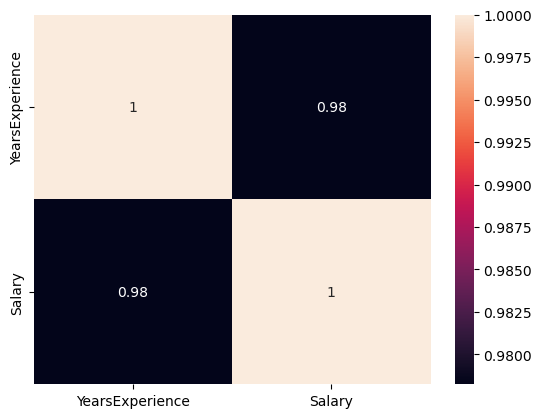

In [55]:
sms.heatmap(data.corr(),annot= True)

In [56]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


DIVISION DES DONNES EN VARIABLE DEP ET INDEP

In [57]:
data.shape

(30, 2)

In [58]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [59]:
#variable independante
X = data.iloc[:, :-1].values

#Variable dependante
y = data.iloc[:, -1].values

In [60]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [61]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

separation des données 

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [63]:
# Affcihage de dimensiom
print("X train:", X_train.shape)
print("y train:", y_train.shape)

X train: (21, 1)
y train: (21,)


In [64]:
print("X test:", X_test.shape)
print("y test:", y_test.shape)

X test: (9, 1)
y test: (9,)


CRÉATION DU MODÈLE

Regression Lineaire

In [65]:
#Création du model
model_lineaire = LinearRegression()

In [66]:
# Entrainement du modele
model_lineaire.fit(X_train, y_train)

LinearRegression()

In [67]:
#Faire la prédiction
y_test   


array([ 67938., 122391., 116969.,  63218., 109431.,  39343.,  64445.,
        60150., 105582.])

In [68]:
y_predicted_lr = model_lineaire.predict(X_test)
y_predicted_lr

array([ 71527.04427312, 124698.55442095, 116821.29365831,  61680.46831981,
       108944.03289567,  34110.05565056,  54787.8651525 ,  52818.54996184,
       111898.00568166])

In [69]:
#Evaluation du model
mean_squared_error(y_test, y_predicted_lr)

26123894.60572836

In [70]:
r2_score(y_test, y_predicted_lr)

0.9678098662339668

In [71]:
print("Mean Squared Error:", mean_squared_error(y_test, y_predicted_lr))
print("R2 Squared:", r2_score(y_test, y_predicted_lr))

Mean Squared Error: 26123894.60572836
R2 Squared: 0.9678098662339668


In [72]:
data.shape

(30, 2)

VERIFICATION DE LA PREDICTION 

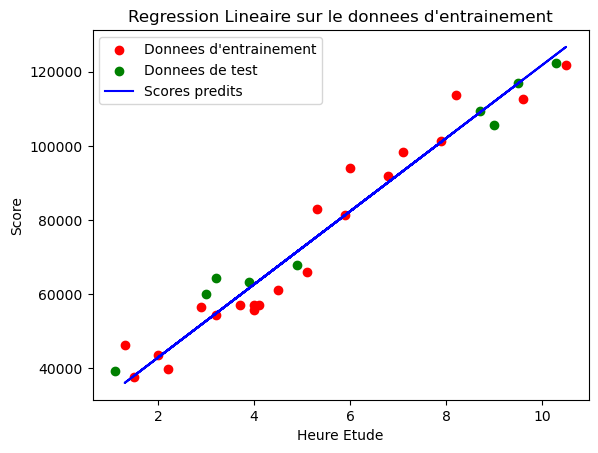

In [73]:
plt.scatter(X_train, y_train, color='red', label="Donnees d'entrainement") # Donner d'entrainement
plt.scatter(X_test, y_test, color='Green', label="Donnees de test")
plt.plot(X_train, model_lineaire.predict(X_train), color='blue', label="Scores predits")
#plt.scatter(X_train, y_train, color='red')
plt.xlabel("Heure Etude")
plt.ylabel("Score")
plt.title("Regression Lineaire sur le donnees d'entrainement")
plt.legend()
plt.show()

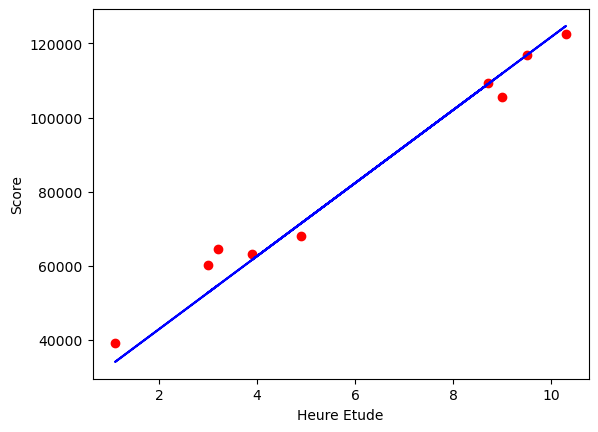

In [74]:
plt.scatter(X_test, y_test, color='red') # Donner d'entrainement
plt.plot(X_test, y_predicted_lr, color='blue') # La ligne de la regression
plt.xlabel("Heure Etude")
plt.ylabel("Score")
plt.show()


ATTACHAGE DES PARAMÈTRES D’EQUATION

In [75]:
model_lineaire.coef_

array([9846.5759533])

In [76]:
model_lineaire.intercept_

23278.82210193066

In [77]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [78]:
model_lineaire.predict([[2.5]])

array([47895.26198519])

In [79]:
model_lineaire.predict([[5]])

array([72511.70186845])

RANDOM FOREST

In [80]:
model_Random_Forest =RandomForestRegressor()
model_Random_Forest.fit(X_train, y_train)

RandomForestRegressor()

In [81]:
y_predicted_rf = model_Random_Forest.predict(X_test)

In [82]:
print("Mean Squared Error De Random Forest:", mean_squared_error(y_test, y_predicted_rf))
print("R2 Squared de Random Forest:", r2_score(y_test, y_predicted_rf))

Mean Squared Error De Random Forest: 26621983.256691784
R2 Squared de Random Forest: 0.9671961162344419


FAIRE LA SIMPLE PRESICTION

In [83]:
model_Random_Forest.predict([[79000]])

array([117280.61])

In [84]:
model_Random_Forest.predict([[29500]])

array([117280.61])

ARBRE DE DÉCISION

In [85]:
model_decission_tree=DecisionTreeRegressor()
model_decission_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [86]:
y_predicted_dt = model_decission_tree.predict(X_test)

In [87]:
print("Mean Squar Error d arbre de decision:",mean_squared_error(y_test, y_predicted_dt)) 
print("r2_score d arbre de decision:", r2_score(y_test, y_predicted_dt))

Mean Squar Error d arbre de decision: 33094231.361111112
r2_score d arbre de decision: 0.9592209450207849


In [88]:
model_decission_tree.predict([[79000]])

array([121872.])

In [89]:
model_decission_tree.predict([[79000]])

array([121872.])

In [90]:
model_decission_tree.predict([[29500]])

array([121872.])